In [3]:
import pandas as pd
import MySQLdb
import numpy as np
import pandas.io.sql as sql
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
mysql_conn= MySQLdb.connect(host='127.0.0.1', 
                port=3306,user='root', passwd='', 
                db='Adnalytics_FinalDB')

In [5]:
cursor = mysql_conn.cursor()

In [6]:
query = "SELECT Ad_Title, Ad_Display_Position, Ad_Type, Search_Key_Text, Search_Location, \
Linking_Site_URL, Parent_Site_URL, Device_Type, Is_Clicked \
FROM Ad_Impressions, Ads_Information, Search_Information, Search_Keywords, Search_Keywords_Combo \
WHERE Ad_Impressions.Ad_Id = Ads_Information.Ad_Id \
AND Ad_Impressions.Search_Id = Search_Keywords_Combo.Search_Id \
AND Ad_Impressions.Search_Id = Search_Information.Search_Id \
AND Search_Keywords_Combo.Search_Key_Id = Search_Keywords.Search_Key_Id"

In [7]:
cursor.execute(query)

120159L

In [8]:
rows = cursor.fetchall()

In [9]:
ad_impressions_frame = sql.read_sql_query(query, mysql_conn)

In [10]:
ad_impressions_frame.head(10)

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type,Is_Clicked
0,Innovation Observatory,2,Type 2,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://www.vam.ac.uk/,Mobile,1
1,Adrenaline Creative,2,Type 2,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://fairsay.com/,Mobile,1
2,Coal Research Forum (CRF),6,Type 6,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://www.curethenhs.co.uk/,Mobile,1
3,Leeds City Credit Union,2,Type 8,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://www.politicalinnovation.org/,Mobile,1
4,Quaker Theatre Company,4,Type 7,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://news.bbc.co.uk/1/hi/wales/7745707.stm,Mobile,1
5,DW & Associates Ltd,3,Type 1,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://www.waronwant.org/,Mobile,0
6,Eversheds,3,Type 6,Cymru,Fort Wayne,http://www.apr.ac.uk/,http://www.staffs.ac.uk/xcri/,Mobile,0
7,Innovation Observatory,2,Type 2,Glastonbury,Fort Wayne,http://www.apr.ac.uk/,http://www.vam.ac.uk/,Mobile,1
8,Adrenaline Creative,2,Type 2,Glastonbury,Fort Wayne,http://www.apr.ac.uk/,http://fairsay.com/,Mobile,1
9,Coal Research Forum (CRF),6,Type 6,Glastonbury,Fort Wayne,http://www.apr.ac.uk/,http://www.curethenhs.co.uk/,Mobile,1


In [11]:
ad_impressions_frame = ad_impressions_frame.sort_values(['Search_Location'], ascending=[1]);

In [12]:
ad_impressions_frame.head()

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type,Is_Clicked
15375,Clinical & Biomedical Computing Ltd,2,Type 4,Analysis,Akron,http://news.bbc.co.uk/1/hi/world/americas/8021...,http://www.alanmilburn.co.uk/,Mobile,1
2537,"Concrete Centre, The",5,Type 4,BBC,Akron,http://www.unfinishedhistories.com/,http://jonball.org/,Mobile,0
2536,Global Regulatory Services (GRS),6,Type 3,BBC,Akron,http://www.unfinishedhistories.com/,http://www.bbc.co.uk/news/uk-politics-14366522,Mobile,1
2535,"Cloud of Data, The",6,Type 3,BBC,Akron,http://www.unfinishedhistories.com/,http://www.hostuk.org/,Mobile,1
2534,Londonist: Olympic News Round-Up,5,Type 4,BBC,Akron,http://www.unfinishedhistories.com/,http://www.e-d-e.org/?lang=en,Mobile,0


In [13]:
%matplotlib inline

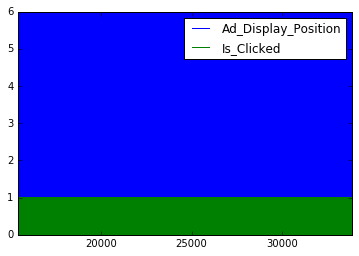

In [14]:
ad_impressions_frame.plot()

In [15]:
ad_impressions_frame.groupby('Ad_Type').mean()

,Ad_Display_Position,Is_Clicked
Ad_Type,,
Type 1,3.486234,0.505733
Type 2,3.467623,0.524793
Type 3,3.512972,0.504708
Type 4,3.514775,0.498800
Type 5,3.555607,0.514658
Type 6,3.492321,0.484933
Type 7,3.532180,0.496174
Type 8,3.485718,0.490330


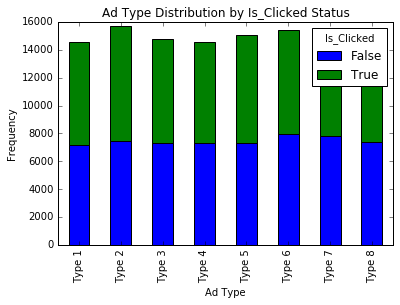

In [16]:
pd.crosstab(ad_impressions_frame.Ad_Type, ad_impressions_frame.Is_Clicked.astype(bool)).plot(kind='bar', stacked=True)
plt.title('Ad Type Distribution by Is_Clicked Status')
plt.xlabel('Ad Type')
plt.ylabel('Frequency')

In [17]:
ads_ctr_model = LogisticRegression()

In [18]:
ad_impressions_frame.describe()

,Ad_Display_Position,Is_Clicked
count,120159.000000,120159.000000
mean,3.505905,0.502601
std,1.490605,0.499995
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,6.000000,1.000000


In [19]:
ad_impressions_frame["Ad_Type"].dtype

dtype('O')

In [20]:
train, test = train_test_split(ad_impressions_frame, test_size = 0.2)

In [21]:
train.head()

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type,Is_Clicked
87624,EC Resourcing,4,Type 6,Wealden,Newark,http://biblbut.wordpress.com/,http://www.nottingham.ac.uk/rippll/,Tablet,1
4952,Scytronix Ltd,2,Type 8,fail,St. Petersburg,http://www.robert-louis-stevenson.org/,http://www.notobikeparkingtax.com/,Mobile,1
28951,Route To Funding Ltd,4,Type 3,Peoples,Denver,http://news.bbc.co.uk/1/hi/technology/3558248.stm,http://ecert.ecs.soton.ac.uk/,Tablet,0
26970,Women's Budget Group,5,Type 3,Historical,Lubbock,http://www.warrington-worldwide.co.uk/articles...,http://www.wolfson.cam.ac.uk/,Tablet,0
113774,Serendipity,3,Type 4,Cymraeg,Corpus Christi,http://www.eddireader.co.uk/,http://www.diaser.org.uk/,Mobile,0


In [22]:
test.tail(10)

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type,Is_Clicked
2639,Ipswich Transport Museum,2,Type 6,Trust,New Orleans,http://www.spinningtheweb.org.uk/,http://kensingtonlabour.com/,Desktop,1
115077,Blind in Business,2,Type 7,Transactions,Stockton,http://paulstubbspoet.wordpress.com/,http://sites.google.com/site/anncryermp/,Desktop,0
112689,Schroders,5,Type 7,Roman,Tampa,http://www.hizb-ut-tahrir.info/,http://topofthecops.com/,Tablet,1
61577,Beremans Limited,3,Type 8,Cymru,Seattle,http://www.annlenny.co.uk/,http://www.british-energy.co.uk/,Desktop,1
58021,B K Tooling,3,Type 4,Hidden,Honolulu,http://www.chorleyandleylandmethodists.org/,http://www.atl.org.uk/,Desktop,1
104394,"Business of Fashion, The",6,Type 1,Society,Spokane,http://www.knowhere.co.uk/,http://www.home-education.org.uk/,Mobile,1
3580,Cambridge Resolution,3,Type 3,Jane,Fresno,http://www.themill-coppermill.org/,http://www.quaker-tapestry.co.uk/,Desktop,0
102240,Versio4,3,Type 7,Gymraeg,Santa Ana,http://www.stivesconservatives.com/,http://www.bnp-chronicle.com/2009/01/bnp-euro-...,Tablet,0
3982,"Ellee Seymour, ProActive PR",5,Type 7,Linen,Tulsa,http://www.boardmantasker.com/,http://didgahenteghadi.persianblog.ir/,Tablet,0
47957,Seeker Movement,2,Type 8,Heart,Stockton,http://news.bbc.co.uk/1/hi/uk/1038703.stm,http://www.lesc.org.uk/,Tablet,0


In [23]:

train.keys()

Index([u'Ad_Title', u'Ad_Display_Position', u'Ad_Type', u'Search_Key_Text',
       u'Search_Location', u'Linking_Site_URL', u'Parent_Site_URL',
       u'Device_Type', u'Is_Clicked'],
      dtype='object')

In [25]:
training_features = train.ix[:, 0:8]

In [26]:
training_features.head()

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type
87624,EC Resourcing,4,Type 6,Wealden,Newark,http://biblbut.wordpress.com/,http://www.nottingham.ac.uk/rippll/,Tablet
4952,Scytronix Ltd,2,Type 8,fail,St. Petersburg,http://www.robert-louis-stevenson.org/,http://www.notobikeparkingtax.com/,Mobile
28951,Route To Funding Ltd,4,Type 3,Peoples,Denver,http://news.bbc.co.uk/1/hi/technology/3558248.stm,http://ecert.ecs.soton.ac.uk/,Tablet
26970,Women's Budget Group,5,Type 3,Historical,Lubbock,http://www.warrington-worldwide.co.uk/articles...,http://www.wolfson.cam.ac.uk/,Tablet
113774,Serendipity,3,Type 4,Cymraeg,Corpus Christi,http://www.eddireader.co.uk/,http://www.diaser.org.uk/,Mobile


In [27]:
training_targets = train.ix[:, 8:9]

In [28]:
training_targets.head()

,Is_Clicked
87624,1
4952,1
28951,0
26970,0
113774,0


In [29]:
training_targets = np.ravel(training_targets)

In [30]:
testing_targets = test.ix[:, 8:9]

In [31]:
testing_targets.head()

,Is_Clicked
63438,1
56975,0
102002,1
57051,0
3824,1


In [32]:
X = training_features.apply(LabelEncoder().fit_transform)

In [33]:
X["Ad_Title"].dtype

dtype('int64')

In [34]:
Y = training_targets

In [35]:
ads_ctr_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
ads_ctr_model.score(X, Y)

0.50868122379768432

In [37]:
Y.mean()

0.50264753919294269

In [38]:
testing_features = test.ix[:, 0:8]

In [39]:
X_test = testing_features.apply(LabelEncoder().fit_transform)

In [40]:
X_test.head(10)

,Ad_Title,Ad_Display_Position,Ad_Type,Search_Key_Text,Search_Location,Linking_Site_URL,Parent_Site_URL,Device_Type
63438,1813,5,7,2434,67,2544,3848,2
56975,1072,6,6,226,48,2499,3862,1
102002,1346,5,4,1988,33,549,2767,1
57051,1414,5,0,1712,39,2618,2812,0
3824,379,5,2,558,11,1287,1986,0
115555,1626,2,2,2137,42,1098,1822,0
79295,732,2,7,59,10,2524,1554,2
7751,1965,2,2,22,60,2636,3670,0
89157,1223,3,6,2736,21,1920,186,0
41666,1928,1,2,521,53,1943,1460,0


In [41]:
predicted_targets = ads_ctr_model.predict(X_test)

In [46]:
predicted_targets.sum()

12715

In [43]:
predicted_targets_frame = pd.DataFrame(predicted_targets)
predicted_targets_frame.head(10)

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,1


In [44]:
testing_targets.head(10)

,Is_Clicked
63438,1
56975,0
102002,1
57051,0
3824,1
115555,1
79295,1
7751,0
89157,1
41666,1


In [45]:
testing_targets.sum()

Is_Clicked    12074
dtype: int64